In [2]:
import pandas as pd
import numpy as np
import string
from matplotlib import pyplot as plt
import nltk

In [3]:
df = pd.read_json('winemag-data-130k-v2.json')

In [4]:
df.columns

Index(['points', 'title', 'description', 'taster_name',
       'taster_twitter_handle', 'price', 'designation', 'variety', 'region_1',
       'region_2', 'province', 'country', 'winery'],
      dtype='object')

In [5]:
df.shape

(129971, 13)

In [6]:
df.nunique()

points                       21
title                    118840
description              119955
taster_name                  19
taster_twitter_handle        15
price                       390
designation               37979
variety                     707
region_1                   1229
region_2                     17
province                    425
country                      43
winery                    16757
dtype: int64

(array([ 1089.,  4861., 16010., 29533., 29433., 26769., 16102.,  5293.,
          752.,   129.]),
 array([ 80.,  82.,  84.,  86.,  88.,  90.,  92.,  94.,  96.,  98., 100.]),
 <BarContainer object of 10 artists>)

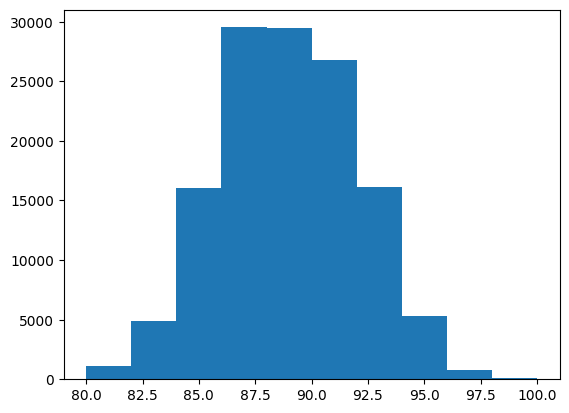

In [7]:
plt.hist(df['points'])

In [8]:
df.describe()

,points,price
count,129971.000000,120975.000000
mean,88.447138,35.363389
std,3.039730,41.022218
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,3300.000000


(array([5.7000e+01, 5.5300e+02, 5.6700e+03, 1.8822e+04, 2.2471e+04,
        2.0931e+04, 2.1365e+04, 1.5328e+04, 9.5100e+03, 3.4560e+03,
        1.7000e+03, 4.9100e+02, 3.2300e+02, 1.3600e+02, 1.0200e+02,
        3.9000e+01, 1.1000e+01, 3.0000e+00, 4.0000e+00, 3.0000e+00]),
 array([1.38629436, 1.72206353, 2.0578327 , 2.39360187, 2.72937104,
        3.06514021, 3.40090938, 3.73667855, 4.07244772, 4.40821688,
        4.74398605, 5.07975522, 5.41552439, 5.75129356, 6.08706273,
        6.4228319 , 6.75860107, 7.09437024, 7.43013941, 7.76590858,
        8.10167775]),
 <BarContainer object of 20 artists>)

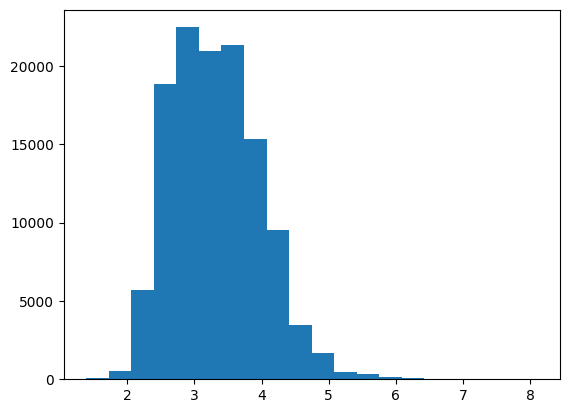

In [9]:
plt.hist(np.log(df['price']), bins = 20)

In [10]:
len(df.designation.unique())

37980

In [11]:
df.isnull().sum()

points                       0
title                        0
description                  0
taster_name              26244
taster_twitter_handle    31213
price                     8996
designation              37465
variety                      1
region_1                 21247
region_2                 79460
province                    63
country                     63
winery                       0
dtype: int64

In [12]:
# Let us work on stripping the titles of irrelevant information

In [13]:
#first, let's download the data again, just to concentrate on this!

In [14]:
df = df.drop_duplicates()

In [15]:
data = df.copy()

In [16]:
def basic_cleaning(sentence):
    sentence = sentence.lower()
    sentence = ''.join(char for char in sentence if not char.isdigit())
    
    for punctuation in string.punctuation:
        sentence = sentence.replace(punctuation, '') 
    
    sentence = sentence.strip()
    
    return sentence

In [17]:
data['description_clean'] = data['description']
data['description_clean'] = data['description_clean'].apply(lambda text: basic_cleaning(text))

In [18]:
data['description_clean']

0         aromas include tropical fruit broom brimstone ...
1         this is ripe and fruity a wine that is smooth ...
2         tart and snappy the flavors of lime flesh and ...
3         pineapple rind lemon pith and orange blossom s...
4         much like the regular bottling from  this come...
                                ...                        
129966    notes of honeysuckle and cantaloupe sweeten th...
129967    citation is given as much as a decade of bottl...
129968    welldrained gravel soil gives this wine its cr...
129969    a dry style of pinot gris this is crisp with s...
129970    big rich and offdry this is powered by intense...
Name: description_clean, Length: 119988, dtype: object

In [19]:
# YOUR CODE HERE
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords 

stop_words = set(stopwords.words('english'))

def stop_word_remover(text):
    tokens = word_tokenize(text)
    tokens_cleaned = [w for w in tokens if not w in stop_words] 
    text = ' '.join(word for word in tokens_cleaned)
    return text


In [20]:
data['description_clean'] = data['description_clean'].apply(lambda text: stop_word_remover(text))

In [21]:
data['description_clean']

0         aromas include tropical fruit broom brimstone ...
1         ripe fruity wine smooth still structured firm ...
2         tart snappy flavors lime flesh rind dominate g...
3         pineapple rind lemon pith orange blossom start...
4         much like regular bottling comes across rather...
                                ...                        
129966    notes honeysuckle cantaloupe sweeten delicious...
129967    citation given much decade bottle age prior re...
129968    welldrained gravel soil gives wine crisp dry c...
129969    dry style pinot gris crisp acidity also weight...
129970    big rich offdry powered intense spiciness roun...
Name: description_clean, Length: 119988, dtype: object

In [22]:
# Lemmatize?
data.winery.nunique()

16757

In [23]:
data['description_clean'] = data['description_clean'].apply(lambda text: basic_cleaning(text))

In [24]:
data.head()

,points,title,description,taster_name,taster_twitter_handle,price,designation,variety,region_1,region_2,province,country,winery,description_clean
0,87,Nicosia 2013 Vulkà Bianco (Etna),"Aromas include tropical fruit, broom, brimston...",Kerin O’Keefe,@kerinokeefe,NaN,Vulkà Bianco,White Blend,Etna,None,Sicily & Sardinia,Italy,Nicosia,aromas include tropical fruit broom brimstone ...
1,87,Quinta dos Avidagos 2011 Avidagos Red (Douro),"This is ripe and fruity, a wine that is smooth...",Roger Voss,@vossroger,15.0,Avidagos,Portuguese Red,None,None,Douro,Portugal,Quinta dos Avidagos,ripe fruity wine smooth still structured firm ...
2,87,Rainstorm 2013 Pinot Gris (Willamette Valley),"Tart and snappy, the flavors of lime flesh and...",Paul Gregutt,@paulgwine,14.0,None,Pinot Gris,Willamette Valley,Willamette Valley,Oregon,US,Rainstorm,tart snappy flavors lime flesh rind dominate g...
3,87,St. Julian 2013 Reserve Late Harvest Riesling ...,"Pineapple rind, lemon pith and orange blossom ...",Alexander Peartree,None,13.0,Reserve Late Harvest,Riesling,Lake Michigan Shore,None,Michigan,US,St. Julian,pineapple rind lemon pith orange blossom start...
4,87,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,"Much like the regular bottling from 2012, this...",Paul Gregutt,@paulgwine,65.0,Vintner's Reserve Wild Child Block,Pinot Noir,Willamette Valley,Willamette Valley,Oregon,US,Sweet Cheeks,much like regular bottling comes across rather...


In [25]:
from nltk.tokenize import word_tokenize

In [26]:
#data['description_clean_tokenize'] = data['description_clean'].apply(lambda text: word_tokenize(text))
data['description_clean_tokenize'] = data['description_clean'].apply(lambda text: set(word_tokenize(text)))

In [27]:
data.description_clean_tokenize

0         {dried, include, sage, unripened, aromas, appl...
1         {although, better, smooth, fruits, already, dr...
2         {acidity, lime, pokes, stainlesssteel, dominat...
3         {slightly, blossom, finish, start, pith, aroma...
4         {nonetheless, across, like, think, rather, her...
                                ...                        
129966    {sweeten, quenching, intensely, deliciously, g...
129967    {cherry, compote, decade, secondary, gracefull...
129968    {favor, soil, structure, subdued, although, ag...
129969    {core, structure, weight, developing, age, app...
129970    {rich, texture, spiciness, drink, rounded, fru...
Name: description_clean_tokenize, Length: 119988, dtype: object

In [28]:
data['description_clean_tokenize_size'] = data['description_clean_tokenize'].apply(lambda text: len(text))

In [29]:
data['description_clean_tokenize_size']

0         20
1         20
2         16
3         21
4         24
          ..
129966    21
129967    24
129968    20
129969    22
129970    17
Name: description_clean_tokenize_size, Length: 119988, dtype: int64

(array([2.3000e+01, 2.7300e+02, 2.4610e+03, 6.9030e+03, 1.3642e+04,
        2.8035e+04, 2.2996e+04, 2.3128e+04, 1.0641e+04, 6.0500e+03,
        3.7590e+03, 1.1300e+03, 6.0600e+02, 1.9500e+02, 7.6000e+01,
        4.4000e+01, 1.2000e+01, 1.0000e+01, 2.0000e+00, 2.0000e+00]),
 array([ 2. ,  5.4,  8.8, 12.2, 15.6, 19. , 22.4, 25.8, 29.2, 32.6, 36. ,
        39.4, 42.8, 46.2, 49.6, 53. , 56.4, 59.8, 63.2, 66.6, 70. ]),
 <BarContainer object of 20 artists>)

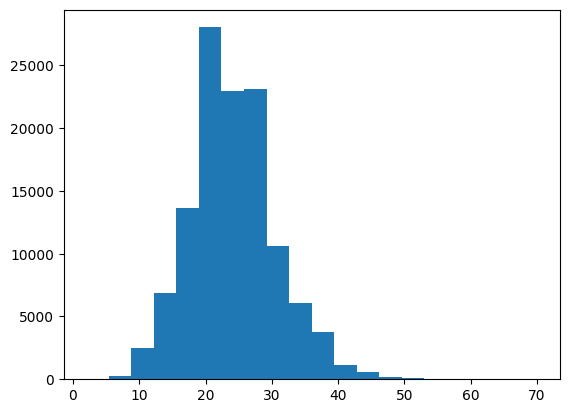

In [30]:
plt.hist(data['description_clean_tokenize_size'], bins = 20)

In [31]:
data['description_clean_tokenize'][0]

{'acidity',
 'alongside',
 'apple',
 'aromas',
 'brimstone',
 'brisk',
 'broom',
 'citrus',
 'dried',
 'expressive',
 'fruit',
 'herb',
 'include',
 'isnt',
 'offering',
 'overly',
 'palate',
 'sage',
 'tropical',
 'unripened'}

In [32]:
data.index

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            129961, 129962, 129963, 129964, 129965, 129966, 129967, 129968,
            129969, 129970],
           dtype='int64', length=119988)

In [33]:
allwords=set()

for i in data.index:
    allwords = allwords.union(data['description_clean_tokenize'][i])
    

In [34]:
len(allwords)

44503

In [35]:
allwords

{'waif',
 'choice',
 'limitedproduction',
 'souces',
 'vanillabean',
 'mountainbased',
 'undervalued',
 'setback',
 'pgs',
 'stocky',
 'weed',
 'priest',
 'diamonds',
 'saltabred',
 'magnificent',
 'winds',
 'sourness',
 'dane',
 'endured',
 'cranpomegranate',
 'lebanon',
 'violetscented',
 'burnedcaramel',
 'letzenberg',
 'kidonitsa',
 'honeybush',
 'culprit',
 'fastfood',
 'err',
 'atypically',
 'clover—a',
 'aubebased',
 'daren',
 'fanatic',
 'sink',
 'quality—like',
 'nv',
 'browns',
 'alsacestyle',
 'stand',
 'showcased',
 'trove',
 'reiver',
 'trunk',
 'southwest',
 'defining',
 'casorzo',
 'frangipane',
 'musar',
 'peelings',
 'candybarsweet',
 'moderno',
 'berryfruited',
 'bases',
 'redbordeaux',
 'moody',
 'cinzano',
 'pliantly',
 'wooden',
 'mullineux',
 'lamouller',
 'syrupy',
 'dété',
 'enamelpeeling',
 'earth—sand',
 'grenadinekirschlike',
 'readytodrink',
 'outlay',
 'algaegreenness',
 'discordant',
 'manufactured',
 'jams',
 'number—this',
 'uplifting',
 'fooled',
 'cand

In [36]:
from sklearn.feature_extraction.text import CountVectorizer

In [37]:
data.head()

,points,title,description,taster_name,taster_twitter_handle,price,designation,variety,region_1,region_2,province,country,winery,description_clean,description_clean_tokenize,description_clean_tokenize_size
0,87,Nicosia 2013 Vulkà Bianco (Etna),"Aromas include tropical fruit, broom, brimston...",Kerin O’Keefe,@kerinokeefe,NaN,Vulkà Bianco,White Blend,Etna,None,Sicily & Sardinia,Italy,Nicosia,aromas include tropical fruit broom brimstone ...,"{dried, include, sage, unripened, aromas, appl...",20
1,87,Quinta dos Avidagos 2011 Avidagos Red (Douro),"This is ripe and fruity, a wine that is smooth...",Roger Voss,@vossroger,15.0,Avidagos,Portuguese Red,None,None,Douro,Portugal,Quinta dos Avidagos,ripe fruity wine smooth still structured firm ...,"{although, better, smooth, fruits, already, dr...",20
2,87,Rainstorm 2013 Pinot Gris (Willamette Valley),"Tart and snappy, the flavors of lime flesh and...",Paul Gregutt,@paulgwine,14.0,None,Pinot Gris,Willamette Valley,Willamette Valley,Oregon,US,Rainstorm,tart snappy flavors lime flesh rind dominate g...,"{acidity, lime, pokes, stainlesssteel, dominat...",16
3,87,St. Julian 2013 Reserve Late Harvest Riesling ...,"Pineapple rind, lemon pith and orange blossom ...",Alexander Peartree,None,13.0,Reserve Late Harvest,Riesling,Lake Michigan Shore,None,Michigan,US,St. Julian,pineapple rind lemon pith orange blossom start...,"{slightly, blossom, finish, start, pith, aroma...",21
4,87,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,"Much like the regular bottling from 2012, this...",Paul Gregutt,@paulgwine,65.0,Vintner's Reserve Wild Child Block,Pinot Noir,Willamette Valley,Willamette Valley,Oregon,US,Sweet Cheeks,much like regular bottling comes across rather...,"{nonetheless, across, like, think, rather, her...",24


(array([2.9600e+02, 9.3640e+03, 4.1677e+04, 4.6124e+04, 1.6691e+04,
        4.8890e+03, 8.0100e+02, 1.2000e+02, 2.2000e+01, 4.0000e+00]),
 array([ 2. ,  8.8, 15.6, 22.4, 29.2, 36. , 42.8, 49.6, 56.4, 63.2, 70. ]),
 <BarContainer object of 10 artists>)

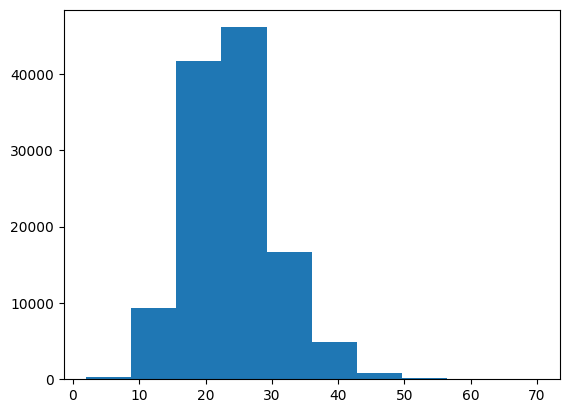

In [38]:
plt.hist(data.description_clean_tokenize_size)

In [39]:
lst = data['description_clean'].explode().to_list()

In [40]:
lst

['aromas include tropical fruit broom brimstone dried herb palate isnt overly expressive offering unripened apple citrus dried sage alongside brisk acidity',
 'ripe fruity wine smooth still structured firm tannins filled juicy red berry fruits freshened acidity already drinkable although certainly better',
 'tart snappy flavors lime flesh rind dominate green pineapple pokes crisp acidity underscoring flavors wine stainlesssteel fermented',
 'pineapple rind lemon pith orange blossom start aromas palate bit opulent notes honeydrizzled guava mango giving way slightly astringent semidry finish',
 'much like regular bottling comes across rather rough tannic rustic earthy herbal characteristics nonetheless think pleasantly unfussy country wine good companion hearty winter stew',
 'blackberry raspberry aromas show typical navarran whiff green herbs case horseradish mouth fairly full bodied tomatoey acidity spicy herbal flavors complement dark plum fruit finish fresh grabby',
 'heres bright in

In [41]:
count_vectorizer = CountVectorizer(max_features=2000)
X = count_vectorizer.fit_transform(lst)
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
X = pd.DataFrame(
    X.toarray(),
     columns = count_vectorizer.get_feature_names_out(),
     index = lst
)

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
#sklearn.feature_extraction.text.TfidfVectorizer(*, input='content', encoding='utf-8', decode_error='strict', strip_accents=None, lowercase=True, preprocessor=None, tokenizer=None, analyzer='word', stop_words=None, token_pattern='(?u)\b\w\w+\b', ngram_range=(1, 1), max_df=1.0, min_df=1, max_features=None, vocabulary=None, binary=False, dtype=<class 'numpy.float64'>, norm='l2', use_idf=True, smooth_idf=True, sublinear_tf=False)[source]
#Y= TfidfVectorizer(lst[0:2000],strip_accents=)